# Setup Variables and home directory

MNIST, FashionMNIST, GTSRB, Cifar10

In [1]:
# set homw directory
import os
from pathlib import Path

base = Path().cwd()

if base.name != 'runtime-monitoring':
    os.chdir('../')
    base = Path().cwd()

base

PosixPath('/home/ah19/runtime-monitoring')

In [2]:
DATASET = 'MNIST'
SEED = 42
CUDA = 0
GPU_NAME = f'cuda:{CUDA}'

In [3]:
# disable warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from fastprogress import progress_bar

from utilities.utils import load_json, load_pickle
from utilities.pathManager import fetchPaths
from utilities.MonitorUnifiedBDD import MonitorBDD

# Paths

In [5]:
paths = fetchPaths(base, DATASET, '', False)

path_data = paths['data']
path_model_stats = paths['saved_models'].parent.parent

# Seed

In [6]:
np.random.seed(SEED)

# Import Data

In [27]:
# import Data
model_stats = pd.read_csv(path_model_stats / f"{DATASET}_model_stats.csv")

for i in range(model_stats.shape[0]):
    model_stats.at[i, 'train_losses'] = ast.literal_eval(model_stats.loc[i, 'train_losses'])
    model_stats.at[i, 'test_losses'] = ast.literal_eval(model_stats.loc[i, 'test_losses'])
    model_stats.at[i, 'train_accs'] = ast.literal_eval(model_stats.loc[i, 'train_accs'])
    model_stats.at[i, 'test_accs'] = ast.literal_eval(model_stats.loc[i, 'test_accs'])

In [28]:
model_stats

,lhl,optim,scheduler,epochs,best_epoch,train_losses,test_losses,train_accs,test_accs,train_loss,test_loss,train_acc,test_acc
0,5,SGD,MultiStepLR,4,1,"[1.2963336272239685, 0.46247188868522643, 0.34...","[0.505587512627244, 0.22340407301313603, 0.196...","[0.571066677570343, 0.8905500173568726, 0.9088...","[0.9154647588729858, 0.954026460647583, 0.9497...",0.232330,0.223404,0.950183,0.954026
1,30,SGD,MultiStepLR,7,4,"[0.6900758783896764, 0.26295684047341344, 0.23...","[0.2044677197909317, 0.13090017050182304, 0.12...","[0.8102166652679443, 0.9281499981880188, 0.932...","[0.9470152258872986, 0.9626402258872986, 0.964...",0.110750,0.106902,0.969950,0.971555
2,60,SGD,MultiStepLR,8,7,"[0.6065059197624525, 0.2452011664956808, 0.226...","[0.18552285389234432, 0.12430223253651117, 0.1...","[0.8282166719436646, 0.932533323764801, 0.9356...","[0.950120210647583, 0.9660456776618958, 0.9657...",0.062815,0.063146,0.984417,0.982572


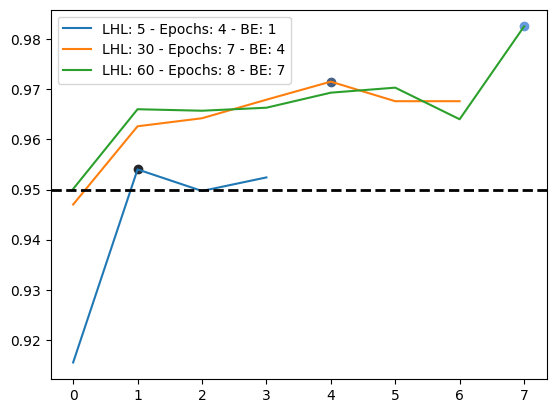

In [29]:
palette = sns.dark_palette('#69d', model_stats.shape[0])

col = 'test_accs'

for i in range(model_stats.shape[0]):
    plt.scatter(model_stats['best_epoch'][i], model_stats['test_acc'][i], color=palette[i])
    sns.lineplot(
        x=range(len(model_stats[col][i])),
        y=model_stats[col][i],
        palette=[palette[i]],
        label=f"LHL: {model_stats['lhl'][i]} - Epochs: {model_stats['epochs'][i]} - BE: {model_stats['best_epoch'][i]}"
    )
    
plt.axhline(0.95, color='black', linewidth=2, linestyle='--')

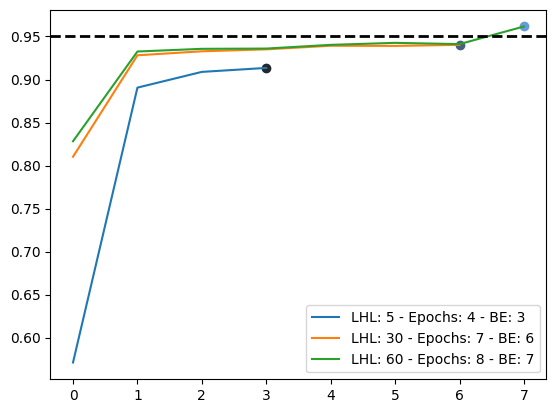

In [30]:
palette = sns.dark_palette('#69d', model_stats.shape[0])

col = 'train_accs'

for i in range(model_stats.shape[0]):
    idx = np.argmax(model_stats[col][i])
    plt.scatter(idx, model_stats[col][i][idx], color=palette[i])
    sns.lineplot(
        x=range(len(model_stats[col][i])),
        y=model_stats[col][i],
        palette=[palette[i]],
        label=f"LHL: {model_stats['lhl'][i]} - Epochs: {model_stats['epochs'][i]} - BE: {idx}"
    )
    
plt.axhline(0.95, color='black', linewidth=2, linestyle='--')

<Axes: xlabel='lhl'>

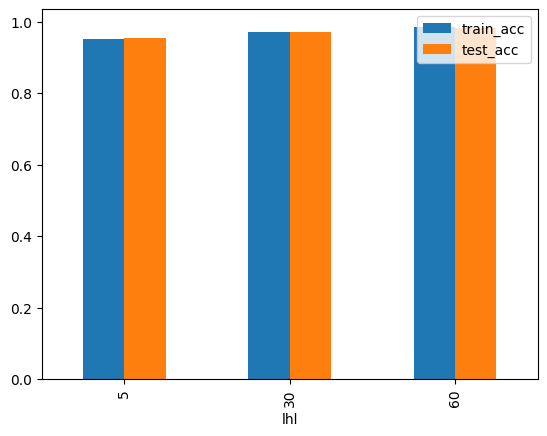

In [32]:
model_stats[['lhl','train_acc','test_acc']].set_index('lhl').plot.bar()

<Axes: xlabel='lhl'>

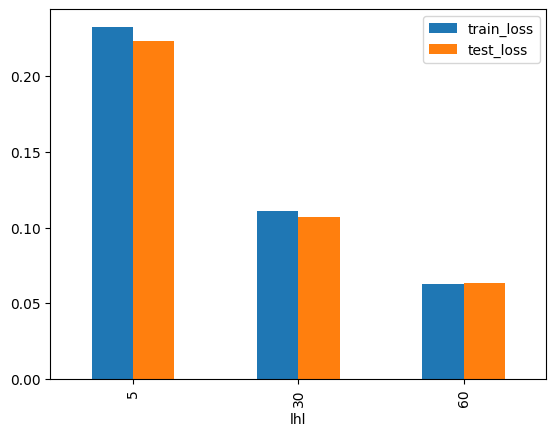

In [33]:
model_stats[['lhl','train_loss', 'test_loss']].set_index('lhl').plot.bar()